##NAME : ESHANT MAHALE
##TASK 5: EDA ON IPL DATASET

####TASK: As a Sports Analyst, We have to suggest players and team to companies for endorsing their products with relevant and meaningful Insights. 

#Reading and Preprocessing the dataset

In [ ]:
#importing initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#loading the dataset in the fl_data dataframe
matches= pd.read_csv("/matches.csv")
deliveries = pd.read_csv("/deliveries.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.shape

(756, 18)

Thus we have a matches dataset which contains all the details of each match with 756 entries and 18 columns.

In [ ]:
#checking for null values in the dataset
matches.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Here we can see there are not much null values in out dataset, excluding the umpire3 column which has 637 entries null(which is over 80% of data).
Moreover in our analysis we dont really need the umpire data so we can drop the three umpires columns from our dataset.

In [ ]:
#droping the umpire columns
matches.drop("umpire3", axis = 1, inplace = True)
matches.drop("umpire1", axis = 1, inplace = True)
matches.drop("umpire2", axis = 1, inplace = True)
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

Thus we can see that the three upire columns have been removed.
Now we will check the null values in the other columns and check the reason for missing data.


In [ ]:
#first lets rename each null value with "Not Known " for simplicity
matches["city"].fillna("Not Known", inplace=True)
matches["winner"].fillna("Not Known", inplace=True)
matches["player_of_match"].fillna("Not Known", inplace=True)

Now lets check the venue column for those entries with missing city , and check if we can incur city names from that.

In [ ]:
matches[matches["city"] == "Not Known"]["venue"]

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

Thus we can see that all those matches with missing city were held in Dubai International Stadium , thus we can input the city as "Dubai" for these entries. 

In [ ]:
#imputing city as Dubai for missing entries
matches["city"] = matches["city"].replace(["Not Known"],"Dubai")
print(matches["city"].unique())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali' 'Bengaluru']


Thus the dubai city was sucessfully imputed in place of Null values.
Now we have 4 null values in winner and player of match ,lets dig and find the reason.

In [ ]:
print(matches[matches["winner"]=="Not Known"]["result"])

300    no result
545    no result
570    no result
744    no result
Name: result, dtype: object


In [ ]:
print(matches[matches["player_of_match"]=="Not Known"]["result"])

300    no result
545    no result
570    no result
744    no result
Name: result, dtype: object


Thus we can see that the no result matches of both columns are common(check the id numbers of above both results)
Thus we can remove these 4 entries from our analysis, as it wouldnt remove much of our data and it wont give us meaningful insights.


In [ ]:
matches.drop(matches.index[matches["player_of_match"]=="Not Known"],inplace=True)
matches.shape

(752, 15)

Thus we have removed 4 entries.
therefore this ends our preprocessing of data where we:
1)Imputed missing city values with Dubai
2)Drop three irrelevant umpire columns
3)Droped four incomplete entries

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries.shape

(179078, 21)

Next we have a deliveries dataset containing the data regarding each ball with 179078 entries and 21 columns.

#Overall Team Analysis

Now lets check the overall analysis of the teams across all the ipl seasons.

In [ ]:
season_winners = matches[["season","winner"]]
season_winners = season_winners.drop_duplicates(subset = ["season"], keep = "last")
season_winners.reset_index(drop=True).sort_values("season")

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [ ]:
season_winners["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

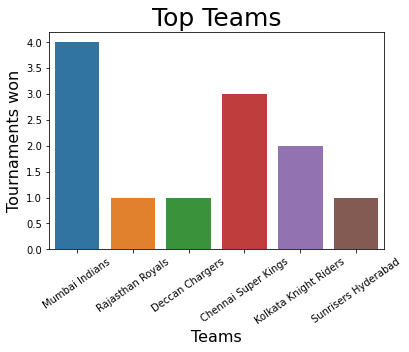

In [ ]:
#lets plot the season winners and see which teams have won the most cups.
sns.countplot(data=season_winners,x="winner")
plt.xlabel("Teams", fontsize = 16)
plt.ylabel("Tournaments won", fontsize = 16)
plt.title("Top Teams", fontsize = 25)
plt.xticks(rotation = 35, fontsize = 10)
plt.show()

Thus this shows that Mumbai Indians has won the most IPL titles (four) followed by Chennai Super Kings and Kolkata Knight Rides with three and two titles respectively.



Now lets check the Total number of wins of each across all seasons.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


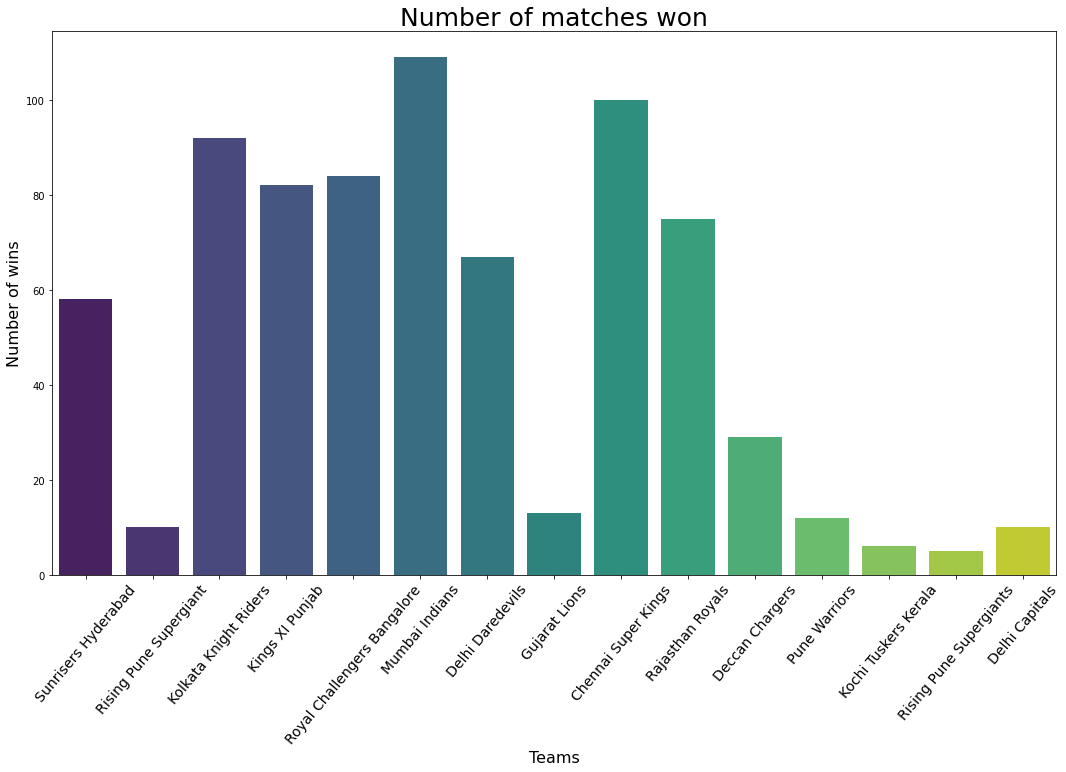

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot("winner",data = matches, palette="viridis")
plt.title("Number of matches won", fontsize = 25)
plt.xlabel("Teams",fontsize = 16)
plt.ylabel("Number of wins", fontsize = 16)
plt.xticks(rotation = 50,  fontsize = 14)
plt.show()

Thus we can see that MUMBAI INDIANS have won the most number of games followed by CHENNAI SUPER KINGS and KOLKATA KNIGHT RIDERS.

**Thus Mumbai Indians is the best franchise to endorse in, followed by Chennai super kings and Kolkata Knight riders**

#Impact of TOSS

In [ ]:
toss = matches["toss_decision"].value_counts()
toss

field    460
bat      292
Name: toss_decision, dtype: int64

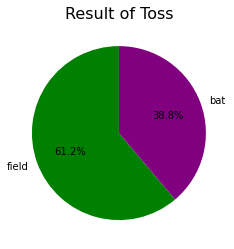

In [ ]:
label = np.array(toss.index)
plt.pie(toss, labels = label,startangle = 90, autopct = "%1.1f%%",colors=["green","purple"])
plt.title("Result of Toss",fontsize = 16)
plt.show()

Thus we can see that 61.2 % of times Teams chose to field after winning the Toss, which is a pretty significant number.


Now lets check the Toss decision trend over all the seasons, and confirm that this shown trend doesnt really explains much about only few seasons or not.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


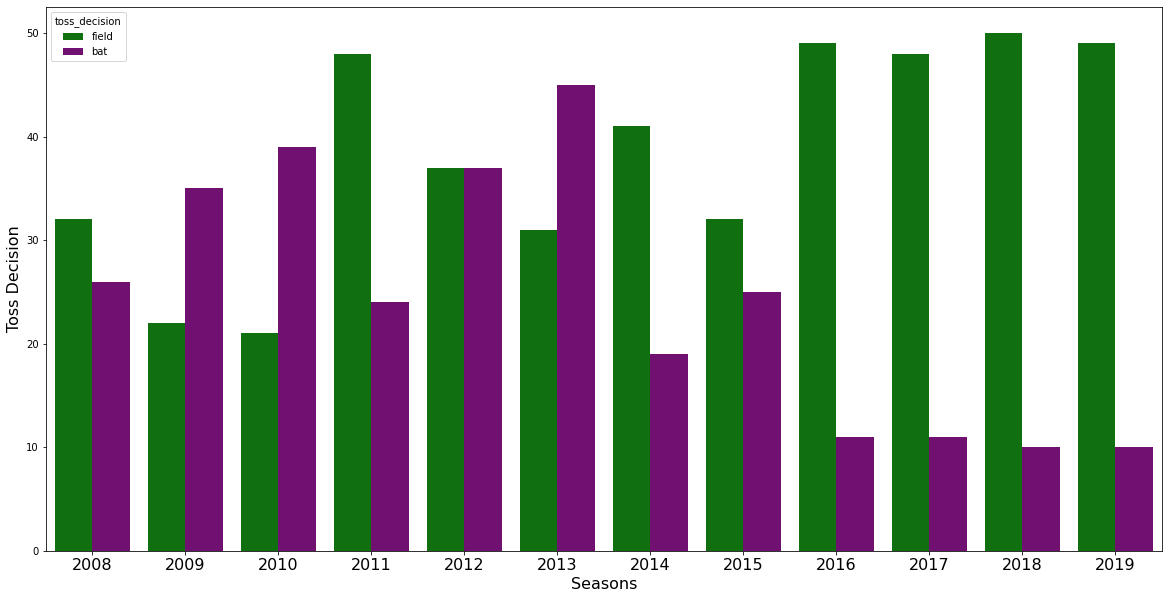

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot("season",data = matches, hue = "toss_decision",palette=['green','purple'])
plt.xlabel("Seasons",fontsize = 16)
plt.ylabel("Toss Decision", fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

Thus it is pretty evident that across all seasons major percentage of times the toss winning captain chose to Bowl first.

Now lets check the impact of the toss on winning of matches.


In [ ]:
toss_match_win = matches["toss_winner"] == matches["winner"]
toss_match_win = toss_match_win.value_counts()
toss_match_win

True     393
False    359
dtype: int64

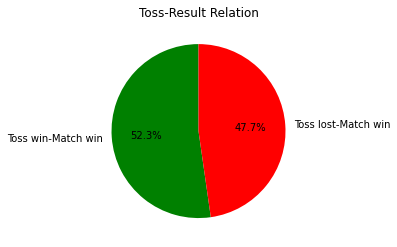

In [ ]:
#Lets see it visually how much percentage of matches have been won by winning the toss
plt.pie(toss_match_win, labels = ["Toss win-Match win","Toss lost-Match win"] ,startangle = 90, autopct = "%1.1f%%",colors=["green","red"])
plt.title("Toss-Result Relation")
plt.show()

Thus we can see here that 52.3% of matches have been won with winning the toss also , therefore we can conclude that:

**Toss plays an significant Role in Result of the match**

#Analysis of Best Player

Now we will analyse the best players across all the seasons using the attribute "player of the match" ,i.e, the Most valuable players(MVP)

In [ ]:
mvp = matches["player_of_match"].value_counts()
top10 = mvp[:10] #here we have the top players with most MoM awards
top10

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

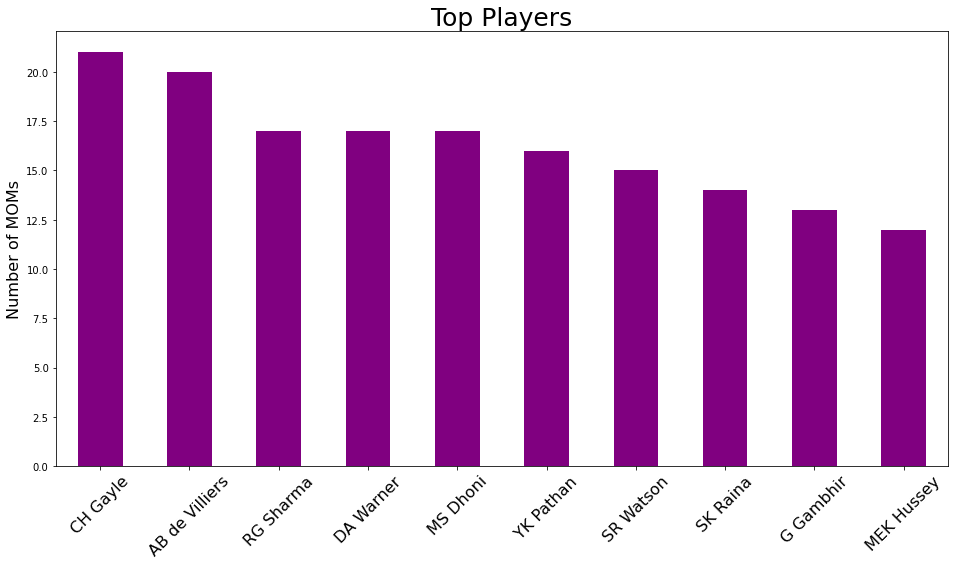

In [ ]:
plt.figure(figsize = (16,8))
top10.plot.bar(color="purple")
plt.ylabel("Number of MOMs", fontsize = 16)
plt.title("Top Players", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

Thus we can see Chris Gayle is the most valuable player with 21 MoM awards , followed by ABde Villers and Rohit Sharma.

**Thus we can suggest these 10 players to companies to endorse in**

#Top Batsmen Analysis

Now lets analyse the top batsmens across all the seaons.
The most important analysing factor of batsmen is the runs,boundaries and strike rate.
Thus now for data for each individual players we will dig into our deliveries dataset.


In [ ]:
indi_data = deliveries.merge(matches[["id","season","winner"]],how = "inner", left_on = "match_id",right_on = "id")
indi_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [ ]:
boundary = indi_data[["batting_team","batsman_runs","batsman"]]
bound4 = boundary[boundary["batsman_runs"] == 4]
Bound4 = bound4.groupby("batting_team")["batsman_runs"].agg([("Fours","count")])
bound6 = boundary[boundary["batsman_runs"] == 6]
Bound6 = bound6.groupby("batting_team")["batsman_runs"].agg([("Sixes","count")])
batsman6 = bound6.groupby("batsman")["batsman_runs"].agg([("Sixes","count")])
batsman4 = bound4.groupby("batsman")["batsman_runs"].agg([("Fours","count")])
Bound = Bound4.merge(Bound6, how = "inner",right_on = "batting_team",left_on="batting_team")
Bound

,Fours,Sixes
batting_team,,
Chennai Super Kings,2193,973
Deccan Chargers,957,400
Delhi Capitals,242,87
Delhi Daredevils,2141,790
Gujarat Lions,460,155
Kings XI Punjab,2458,976
Kochi Tuskers Kerala,170,53
Kolkata Knight Riders,2434,930
Mumbai Indians,2588,1096


In [ ]:
Total_boundaries = Bound["Fours"]+Bound["Sixes"]
Total_boundaries

batting_team
Chennai Super Kings            3166
Deccan Chargers                1357
Delhi Capitals                  329
Delhi Daredevils               2931
Gujarat Lions                   615
Kings XI Punjab                3434
Kochi Tuskers Kerala            223
Kolkata Knight Riders          3364
Mumbai Indians                 3684
Pune Warriors                   721
Rajasthan Royals               2709
Rising Pune Supergiant          286
Rising Pune Supergiants         239
Royal Challengers Bangalore    3453
Sunrisers Hyderabad            1977
dtype: int64

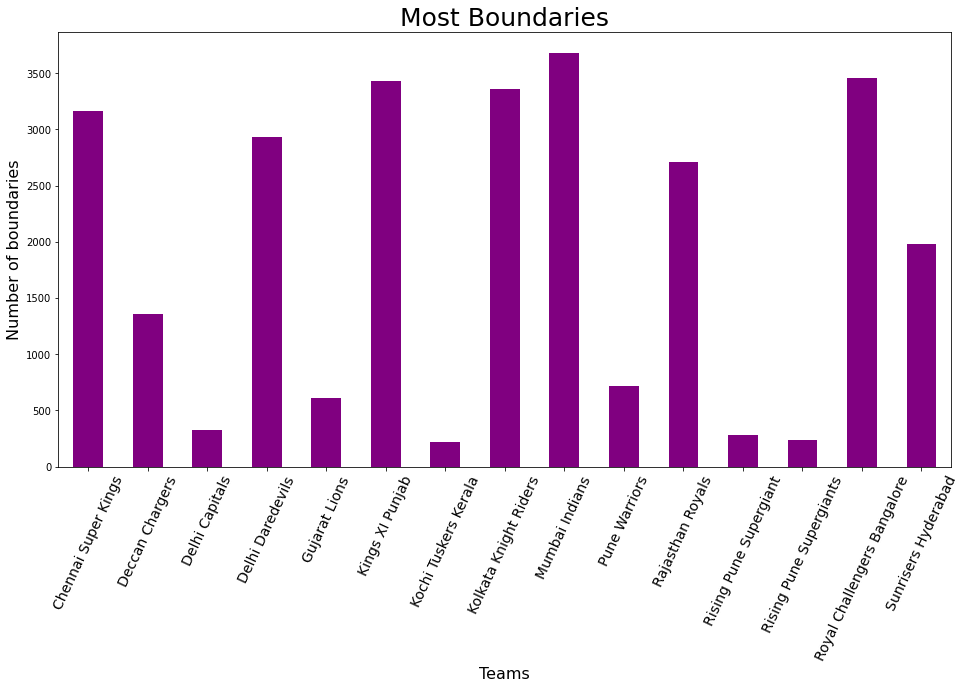

In [ ]:
#lets plot these and check which teams were the most entertaining with most number of boundaries
plt.figure(figsize = (16,8))
Total_boundaries.plot.bar(color="purple")
plt.xlabel("Teams",fontsize = 16)
plt.ylabel("Number of boundaries", fontsize = 16)
plt.title("Most Boundaries", fontsize = 25)
plt.xticks(rotation = 65, fontsize = 14)
plt.show()

Thus we can see that Mumbai Indians have the most number of boundaries (3684) followed by Royal Challengers Bangalore and Kings XI Punjab 

**Thus Mumbai,Royal Challengers Bangalore,Kings XI Punjab were the most interesting teams to watch out for and endorse in**

In [ ]:
#lets find the batsmen with most no of fours
batsman4Top = batsman4.sort_values("Fours",ascending = False)
batsman4Top.head(10)

,Fours
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,481
DA Warner,458
RV Uthappa,436
RG Sharma,431
AM Rahane,405
CH Gayle,375


<Figure size 1440x720 with 0 Axes>

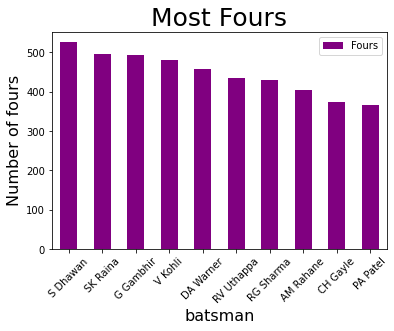

In [ ]:
Top10 = batsman4Top[:10]
plt.figure(figsize = (20,10))
Top10.plot.bar(color="purple")
plt.xlabel("batsman", fontsize = 16)
plt.ylabel("Number of fours", fontsize = 16)
plt.title("Most Fours", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

Thus Shikhar Dhawan has the most no of Fours (526) followed by Suresh raina , G Gambhir and Virat Kohli 

In [ ]:
#lets find the batsmen with most no of sixes
batsman6Top = batsman6.sort_values("Sixes",ascending = False)
batsman6Top.head(10)

,Sixes
batsman,
CH Gayle,326
AB de Villiers,213
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,188
DA Warner,179
SR Watson,177
KA Pollard,175


<Figure size 1440x720 with 0 Axes>

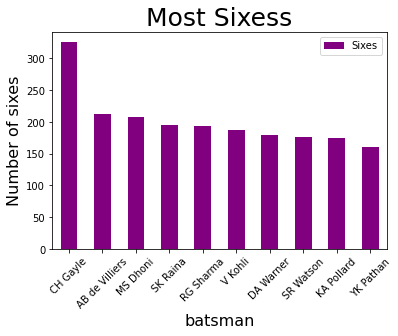

In [ ]:
Top10_6 = batsman6Top[:10]
plt.figure(figsize = (20,10))
Top10_6.plot.bar(color="purple")
plt.xlabel("batsman", fontsize = 16)
plt.ylabel("Number of sixes", fontsize = 16)
plt.title("Most Sixess", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

Thus Chris Gayle has the most number of sixes(326) followed by AbD devillers and MS dhoni.

In [ ]:
#lets find the batsmen with most no of runs
batsman_runs = boundary.groupby("batsman")["batsman_runs"].agg([("Runs","sum")])
batsman_runs_Top = batsman_runs.sort_values("Runs",ascending = False)
batsman_runs_Top.head(10)

,Runs
batsman,
SK Raina,5415
V Kohli,5407
RG Sharma,4914
DA Warner,4722
S Dhawan,4632
CH Gayle,4549
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4361


<Figure size 1440x720 with 0 Axes>

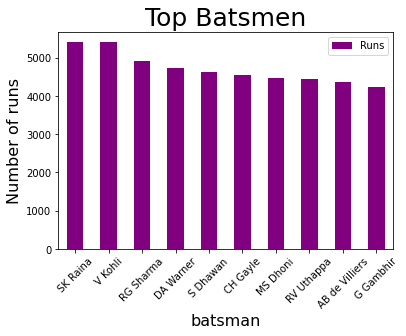

In [ ]:
Top_scorer = batsman_runs_Top[:10]
plt.figure(figsize = (20,10))
Top_scorer.plot.bar(color="purple")
plt.xlabel("batsman", fontsize = 16)
plt.ylabel("Number of runs", fontsize = 16)
plt.title("Top Batsmen", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

Thus we can see that Suresh Raina has most number of runs (5415) followed by Virat Kohli and Rohit sharma.

**Thus in Conlcusion the potential players to endorse in would be Chris Gayle,Suresh Raina, Ab devillers , Virat Kohli, Rohit sharma and David Warner**

#Top Bowler Analysis

First all lets see what types of wickets have been taken beacuse not all wickets are counted in the bowlers Record .

In [ ]:
print(deliveries["dismissal_kind"].unique())

[nan 'caught' 'bowled' 'run out' 'lbw' 'caught and bowled' 'stumped'
 'retired hurt' 'hit wicket' 'obstructing the field']


Thus here obstructing the field, retired hurt and runout isnt counted in the bowlers wicket record. Therefore we will drop these from our analysis.
Also we have some null values in that columns which we have to remove as it wont be necessary in our analysis.

In [ ]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

Thus we have a large amount of missing data in the player_dismissed column. which can be because the players remained Not out, thus we can remove those data from our further analysis. 

In [ ]:
#removing the null values data and the unrequired data from the analysis
wickets = deliveries.dropna(subset=['dismissal_kind'])
wickets = wickets[~wickets['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]


Now lets calculate the number of wickets taken by each bowler and see who has the highest number.

In [ ]:
bowlers = wickets.groupby("bowler")['dismissal_kind'].agg(['count']).reset_index()
bowlers=bowlers.rename(columns={'count':'wickets'})
bowlers

,bowler,wickets
0,A Ashish Reddy,18
1,A Chandila,11
2,A Choudhary,5
3,A Flintoff,2
4,A Joseph,6
...,...,...
343,YA Abdulla,15
344,YK Pathan,42
345,YS Chahal,100
346,Yuvraj Singh,36


In [ ]:
top_bowlers = bowlers.sort_values("wickets",ascending = False)
Top10_bowlers = top_bowlers[:10]
Top10_bowlers

,bowler,wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


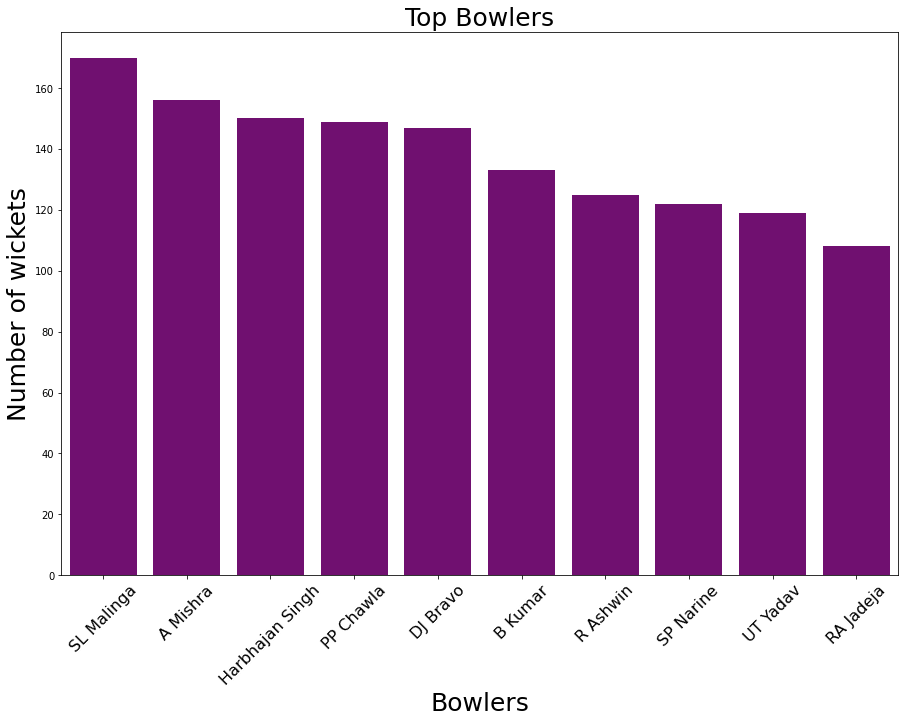

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(data = Top10_bowlers,x = "bowler",y = "wickets",color="purple")
plt.xlabel("Bowlers", fontsize = 25)
plt.ylabel("Number of wickets", fontsize = 25)
plt.title("Top Bowlers", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

Thus we can see that Lasith Malinga has the highest number of wickets(170) followed by Amit mishra and Harabajan Singh.
**Thus These 3 players are good for endorsement**



#Conclusion

1)**Thus Mumbai Indians is the best franchise to endorse in, followed by Chennai super kings and Kolkata Knight riders**

2)**Toss plays an significant Role in Result of the match**

3)**Thus we can suggest Chris gayle , rohit sharma , Abdevillers and david warner to companies to endorse in, as they have most number of player of match awards.**

4)**Thus Mumbai,Royal Challengers Bangalore,Kings XI Punjab were the most interesting teams to watch out for and endorse in, as they had the most number of boundaries**

5) **The potential players to endorse in would be Chris Gayle,Suresh Raina, Ab devillers , Virat Kohli, Rohit sharma and David Warner as they have most number of Runs** 
 a)Thus Chris Gayle has the most number of sixes(326) followed by AbD devillers and MS dhoni.
 b)Thus Shikhar Dhawan has the most no of Fours (526) followed by Suresh raina , G Gambhir and Virat Kohli 

6)**Thus we can see that Lasith Malinga has the highest number of wickets(170) followed by Amit mishra and Harabajan Singh, these players are better to endorse in.**
